# ***Question-2 (K-Means Clustering Implementations)*** 

## **Dependencies**

In [91]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from random import random
import matplotlib.pyplot as plt
import seaborn as sns

## **Calculating Euclidean distance**

In [92]:
def calc_distance(X1, X2):
  return (sum((X1 - X2)**2))**0.5

## **Assigning datapoints to clusters of different centroids**

In [93]:
def find_closest_centroid(centroids, x_train):
  centroid_assign = []
  for point in x_train:
    distances = []
    for centroid in centroids:
      distances.append(calc_distance(centroid,point))
      #print(distances)
    centroid_assign.append(np.argmin(distances))
      #print(centroid_assign)
  return centroid_assign

## **Move the centroids based on the mean of the data points**

In [94]:
def update_centroids(clusters,x_train):
  new_centroids = []
  cluster_df = pd.concat([pd.DataFrame(x_train),pd.DataFrame(clusters,columns=['cluster'])],axis=1)
  for c in set(cluster_df['cluster']):
    current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
    cluster_mean = current_cluster.mean(axis=0)
    new_centroids.append(cluster_mean)
  return new_centroids

## **Assigning the labels to cluster**

In [95]:
def label_cluster(get_centroids,y_train):
  
  actual_labels = {}
  for i in range(len(np.unique(get_centroids))):
    index = np.where(get_centroids == i,1,0)
    num = np.bincount(y_train[index==1].astype('int64')).argmax()
    actual_labels[i] = num
  #print(index)
  return actual_labels

## **Testing on iris dataset (SCRATCH IMPLEMENTATION)**

## **Load the dataset**

In [96]:
iris = pd.read_csv('/content/Iris.csv')

## **Preprocessing**

In [97]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
iris["Species"] = oe.fit_transform(iris[["Species"]])
iris.drop('Id',axis=1,inplace=True)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## **Separation of target and features**

In [98]:
X = iris.values[:, 0:2]
y = iris.values[:, 4]

## **Generation of random indices for centroid**

In [99]:
import random
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,shuffle = True)
k1=10
k2=15
k3=20
# number_of_rows = X_train.shape[0]
init_centroids_1 = random.sample(range(0, len(X_train)), k1)
init_centroids_2 = random.sample(range(0, len(X_train)), k2)
init_centroids_3 = random.sample(range(0, len(X_train)), k3)


print("THE RANDOM INDICES FOR CENTROID(FOR K=10)")
print(init_centroids_1)
print(" ")
print("THE RANDOM INDICES FOR CENTROID(FOR K=15)")
print(init_centroids_2)
print(" ")
print("THE RANDOM INDICES FOR CENTROID(FOR K=20)")
print(init_centroids_3)

THE RANDOM INDICES FOR CENTROID(FOR K=10)
[95, 105, 35, 64, 82, 100, 23, 107, 90, 8]
 
THE RANDOM INDICES FOR CENTROID(FOR K=15)
[40, 108, 0, 42, 115, 100, 111, 44, 49, 17, 96, 91, 26, 112, 118]
 
THE RANDOM INDICES FOR CENTROID(FOR K=20)
[103, 78, 28, 57, 82, 72, 64, 47, 61, 7, 60, 3, 105, 11, 17, 87, 73, 12, 77, 58]


## **Generation of random centroids based on random indices**

In [100]:
centroids_1 = []
for i in init_centroids_1:
    centroids_1.append(X_train[i])
print("THE RANDOM CENTROIDS BASED ON RANDOM INDICES(K=10)")
print(np.array(centroids_1))
print(" ")

centroids_2 = []
for i in init_centroids_2:
    centroids_2.append(X_train[i])
print("THE RANDOM CENTROIDS BASED ON RANDOM INDICES(K=15)")
print(np.array(centroids_2))
print(" ")

centroids_3 = []
for i in init_centroids_3:
    centroids_3.append(X_train[i])
print("THE RANDOM CENTROIDS BASED ON RANDOM INDICES(K=20)")
print(np.array(centroids_3))
print(" ")

THE RANDOM CENTROIDS BASED ON RANDOM INDICES(K=10)
[[5.4 3.9]
 [5.  3.5]
 [5.6 2.5]
 [7.3 2.9]
 [6.9 3.1]
 [6.9 3.1]
 [5.6 2.9]
 [6.7 3.3]
 [4.8 3.4]
 [5.4 3.4]]
 
THE RANDOM CENTROIDS BASED ON RANDOM INDICES(K=15)
[[5.7 2.6]
 [6.2 3.4]
 [5.2 3.5]
 [6.3 3.3]
 [7.7 3. ]
 [6.9 3.1]
 [5.1 3.5]
 [4.6 3.4]
 [5.6 2.8]
 [5.5 2.4]
 [6.5 3. ]
 [5.  2. ]
 [5.4 3. ]
 [6.4 3.2]
 [7.7 2.6]]
 
THE RANDOM CENTROIDS BASED ON RANDOM INDICES(K=20)
[[5.9 3. ]
 [5.8 2.8]
 [6.4 2.8]
 [5.9 3.2]
 [6.9 3.1]
 [6.7 3.3]
 [7.3 2.9]
 [5.3 3.7]
 [6.4 3.2]
 [6.  2.9]
 [4.9 3.1]
 [5.5 2.6]
 [5.  3.5]
 [6.7 3. ]
 [5.5 2.4]
 [5.8 2.7]
 [5.2 4.1]
 [7.7 3.8]
 [5.2 2.7]
 [5.  2.3]]
 


## **Assigning of centroids to datapoints(only for one iteration)**

In [101]:
get_centroids_1 = find_closest_centroid(np.array(centroids_1),X_train)
print("THE ASSIGNED CENTROIDS FOR (K=10)")
print(get_centroids_1)
print("")

get_centroids_2 = find_closest_centroid(centroids_2,X_train)
print("THE ASSIGNED CENTROIDS FOR (K=15)")
print(get_centroids_2)
print("")

get_centroids_3 = find_closest_centroid(centroids_3,X_train)
print("THE ASSIGNED CENTROIDS FOR (K=20)")
print(get_centroids_3)
print("")

THE ASSIGNED CENTROIDS FOR (K=10)
[1, 0, 6, 2, 2, 3, 8, 6, 9, 7, 8, 4, 3, 7, 6, 3, 4, 2, 7, 7, 8, 4, 3, 6, 1, 4, 6, 8, 7, 6, 1, 2, 8, 8, 6, 2, 2, 8, 2, 2, 2, 6, 7, 7, 8, 1, 2, 0, 0, 6, 1, 7, 2, 6, 4, 9, 7, 6, 2, 8, 8, 7, 8, 2, 3, 4, 6, 2, 3, 6, 9, 7, 7, 0, 2, 2, 1, 6, 6, 8, 8, 4, 4, 7, 8, 7, 6, 6, 0, 6, 8, 2, 7, 7, 8, 0, 7, 6, 2, 4, 4, 4, 7, 6, 4, 1, 0, 7, 7, 7, 9, 1, 7, 8, 6, 3, 7, 1, 3, 6]

THE ASSIGNED CENTROIDS FOR (K=15)
[2, 2, 0, 0, 0, 4, 7, 8, 2, 13, 7, 10, 4, 10, 3, 4, 10, 9, 10, 5, 7, 10, 5, 8, 6, 5, 12, 7, 10, 0, 6, 9, 7, 7, 0, 9, 11, 7, 0, 11, 0, 8, 3, 10, 7, 6, 0, 2, 2, 8, 6, 10, 11, 10, 10, 2, 5, 1, 11, 7, 7, 13, 7, 9, 4, 5, 8, 10, 14, 8, 1, 10, 5, 2, 0, 0, 6, 12, 8, 7, 12, 5, 5, 5, 7, 13, 0, 0, 2, 8, 7, 11, 3, 10, 7, 2, 10, 12, 0, 5, 5, 5, 1, 8, 5, 6, 2, 5, 1, 5, 2, 6, 13, 12, 0, 4, 10, 6, 14, 0]

THE ASSIGNED CENTROIDS FOR (K=20)
[12, 7, 9, 11, 2, 17, 10, 9, 7, 8, 10, 13, 17, 2, 9, 6, 13, 14, 13, 13, 10, 2, 6, 1, 12, 4, 18, 10, 2, 9, 12, 14, 10, 10, 15, 11, 19, 10, 15, 1

## **Forming of Dataframe for x_train and y_train**

In [102]:
data_X = pd.DataFrame(X_train)
data_X.columns = ['SEPAL LENGTH','SEPAL WIDTH']
data_X["CLASS"] = y_train
data_X

,SEPAL LENGTH,SEPAL WIDTH,CLASS
0,5.2,3.5,0.0
1,5.4,3.9,0.0
2,6.0,2.7,1.0
3,5.5,2.6,1.0
4,6.3,2.3,1.0
...,...,...,...
115,7.7,3.0,2.0
116,6.3,2.9,2.0
117,5.0,3.3,0.0
118,7.7,2.6,2.0


## **Plotting of clusters after each iteration(for k=10)**

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[1, 0, 6, 2, 2, 3, 8, 6, 9, 7, 8, 4, 3, 7, 6, 3, 4, 2, 7, 7, 8, 4, 3, 6, 1, 4, 6, 8, 7, 6, 1, 2, 8, 8, 6, 2, 2, 8, 2, 2, 2, 6, 7, 7, 8, 1, 2, 0, 0, 6, 1, 7, 2, 6, 4, 9, 7, 6, 2, 8, 8, 7, 8, 2, 3, 4, 6, 2, 3, 6, 9, 7, 7, 0, 2, 2, 1, 6, 6, 8, 8, 4, 4, 7, 8, 7, 6, 6, 0, 6, 8, 2, 7, 7, 8, 0, 7, 6, 2, 4, 4, 4, 7, 6, 4, 1, 0, 7, 7, 7, 9, 1, 7, 8, 6, 3, 7, 1, 3, 6]
CENTROID AFTER EACH UPDATE
          X         Y
0  5.414286  3.985714
1  5.055556  3.500000
2  5.550000  2.388889
3  7.600000  3.112500
4  6.841667  3.008333
5  5.795455  2.850000
6  6.473913  3.100000
7  4.741176  3.176471
8  5.500000  3.400000


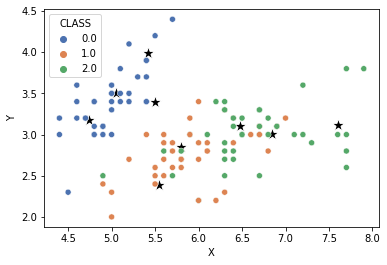

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[1, 0, 5, 2, 5, 3, 7, 5, 8, 6, 7, 4, 3, 6, 5, 3, 4, 2, 6, 4, 7, 6, 4, 5, 1, 4, 8, 7, 6, 5, 1, 2, 7, 7, 5, 2, 2, 7, 5, 7, 2, 5, 6, 6, 7, 1, 2, 0, 0, 5, 1, 6, 2, 5, 4, 1, 4, 5, 2, 7, 7, 6, 7, 2, 3, 3, 5, 5, 3, 5, 8, 6, 6, 0, 2, 2, 1, 2, 5, 7, 7, 4, 4, 4, 7, 6, 5, 5, 0, 5, 7, 2, 6, 6, 7, 0, 6, 5, 2, 4, 4, 4, 6, 5, 4, 1, 0, 6, 6, 4, 8, 1, 6, 7, 5, 3, 6, 1, 3, 5]
CENTROID AFTER EACH UPDATE
          X         Y
0  5.414286  3.985714
1  5.070000  3.490000
2  5.480000  2.400000
3  7.600000  3.187500
4  6.840000  3.020000
5  5.882609  2.800000
6  6.420000  3.075000
7  4.727778  3.127778
8  5.550000  3.300000


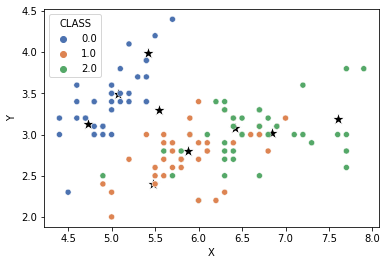

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[1, 0, 5, 2, 5, 3, 7, 5, 8, 6, 7, 4, 3, 6, 5, 3, 4, 2, 6, 4, 7, 6, 4, 5, 1, 4, 8, 7, 6, 5, 1, 2, 7, 7, 5, 2, 2, 7, 5, 7, 5, 5, 6, 6, 7, 1, 2, 0, 0, 5, 1, 6, 2, 5, 4, 1, 4, 8, 2, 7, 7, 6, 1, 2, 3, 3, 5, 5, 3, 5, 8, 6, 4, 0, 2, 5, 1, 2, 5, 7, 7, 4, 4, 4, 7, 6, 5, 5, 0, 5, 7, 2, 6, 6, 7, 0, 6, 8, 2, 4, 4, 4, 6, 5, 4, 1, 0, 4, 6, 4, 8, 1, 6, 7, 5, 3, 6, 1, 3, 5]
CENTROID AFTER EACH UPDATE
          X         Y
0  5.414286  3.985714
1  5.027273  3.500000
2  5.407692  2.400000
3  7.600000  3.187500
4  6.823529  3.052941
5  5.900000  2.739130
6  6.388889  3.050000
7  4.735294  3.100000
8  5.616667  3.233333


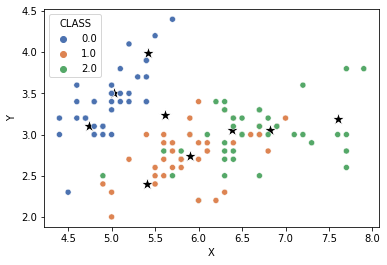

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[1, 0, 5, 2, 5, 3, 7, 5, 8, 6, 7, 4, 3, 6, 6, 3, 4, 2, 6, 4, 7, 6, 4, 8, 1, 4, 8, 7, 6, 5, 1, 2, 7, 7, 5, 2, 2, 7, 5, 7, 5, 5, 6, 6, 7, 1, 2, 0, 0, 5, 1, 6, 2, 5, 4, 1, 4, 8, 2, 1, 7, 6, 1, 2, 3, 3, 5, 5, 3, 5, 8, 6, 4, 0, 5, 5, 1, 2, 5, 7, 7, 4, 4, 4, 7, 6, 5, 5, 0, 5, 1, 2, 6, 6, 7, 0, 6, 8, 5, 4, 4, 4, 6, 5, 4, 1, 0, 4, 6, 4, 8, 1, 6, 7, 5, 3, 6, 1, 3, 5]
CENTROID AFTER EACH UPDATE
          X         Y
0  5.414286  3.985714
1  4.992308  3.484615
2  5.300000  2.436364
3  7.600000  3.187500
4  6.823529  3.052941
5  5.913043  2.673913
6  6.373684  3.047368
7  4.726667  3.060000
8  5.614286  3.185714


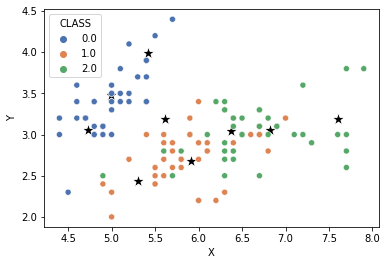

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[1, 0, 5, 2, 5, 3, 7, 5, 8, 6, 7, 4, 3, 6, 6, 3, 4, 2, 6, 4, 7, 6, 4, 8, 1, 4, 8, 7, 6, 5, 1, 2, 7, 7, 5, 2, 2, 7, 5, 7, 5, 5, 6, 6, 7, 1, 5, 0, 0, 5, 1, 6, 2, 5, 4, 1, 4, 8, 2, 1, 7, 6, 1, 2, 3, 3, 5, 5, 3, 8, 8, 4, 4, 0, 5, 5, 1, 2, 5, 7, 7, 4, 4, 4, 7, 6, 5, 5, 0, 5, 1, 2, 6, 6, 7, 0, 6, 8, 5, 4, 4, 4, 6, 5, 4, 1, 0, 4, 6, 4, 8, 1, 6, 7, 5, 3, 6, 1, 3, 5]
CENTROID AFTER EACH UPDATE
          X         Y
0  5.414286  3.985714
1  4.992308  3.484615
2  5.260000  2.430000
3  7.600000  3.187500
4  6.811111  3.050000
5  5.913043  2.656522
6  6.361111  3.050000
7  4.726667  3.060000
8  5.625000  3.150000


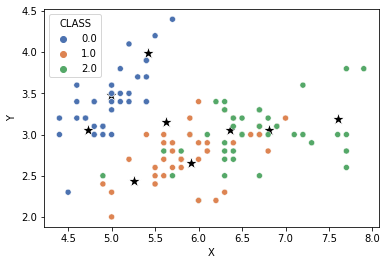

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[1, 0, 5, 2, 5, 3, 7, 5, 8, 6, 7, 4, 3, 6, 6, 3, 4, 2, 6, 4, 7, 6, 4, 8, 1, 4, 8, 7, 6, 5, 1, 2, 7, 7, 5, 2, 2, 7, 5, 2, 5, 5, 6, 6, 7, 1, 5, 0, 0, 5, 1, 6, 2, 6, 4, 1, 4, 8, 2, 1, 7, 6, 1, 2, 3, 3, 5, 5, 3, 8, 8, 4, 4, 0, 5, 5, 1, 2, 5, 7, 7, 4, 4, 4, 7, 6, 5, 5, 0, 8, 1, 2, 6, 6, 7, 0, 6, 8, 5, 4, 4, 4, 6, 8, 4, 1, 0, 4, 6, 4, 8, 1, 6, 7, 5, 3, 6, 1, 3, 5]
CENTROID AFTER EACH UPDATE
          X         Y
0  5.414286  3.985714
1  4.992308  3.484615
2  5.190909  2.418182
3  7.600000  3.187500
4  6.811111  3.050000
5  5.905000  2.610000
6  6.347368  3.042105
7  4.742857  3.114286
8  5.680000  3.120000


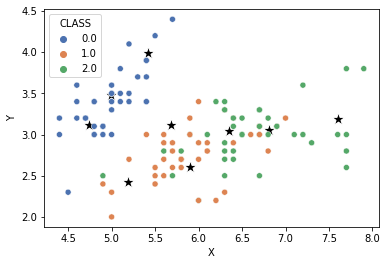

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[1, 0, 5, 2, 5, 3, 7, 5, 8, 6, 7, 4, 3, 6, 6, 3, 4, 2, 6, 4, 7, 6, 4, 8, 1, 4, 8, 7, 6, 5, 1, 2, 7, 7, 5, 5, 2, 7, 5, 2, 5, 5, 6, 6, 7, 1, 5, 0, 0, 8, 1, 6, 2, 6, 4, 1, 4, 8, 2, 1, 7, 6, 1, 2, 3, 3, 5, 5, 3, 8, 8, 4, 4, 0, 5, 5, 1, 2, 5, 7, 7, 4, 4, 4, 7, 6, 5, 5, 0, 8, 1, 2, 6, 6, 7, 0, 6, 8, 5, 4, 4, 4, 6, 8, 4, 1, 0, 4, 6, 4, 8, 1, 6, 7, 5, 3, 6, 1, 3, 5]
CENTROID AFTER EACH UPDATE
          X         Y
0  5.414286  3.985714
1  4.992308  3.484615
2  5.150000  2.410000
3  7.600000  3.187500
4  6.811111  3.050000
5  5.905000  2.595000
6  6.347368  3.042105
7  4.742857  3.114286
8  5.672727  3.090909


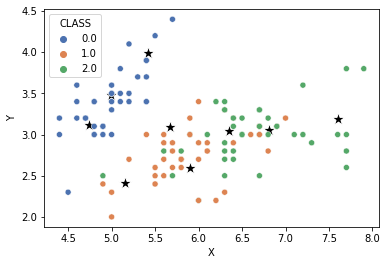

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[1, 0, 5, 2, 5, 3, 7, 5, 8, 6, 7, 4, 3, 6, 6, 3, 4, 2, 6, 4, 7, 6, 4, 8, 1, 4, 8, 7, 6, 5, 1, 2, 7, 7, 5, 5, 2, 7, 5, 2, 5, 5, 6, 6, 7, 1, 5, 0, 0, 8, 1, 6, 2, 6, 4, 1, 4, 8, 2, 1, 7, 6, 1, 2, 3, 3, 5, 5, 3, 8, 8, 4, 4, 0, 5, 5, 1, 2, 5, 7, 7, 4, 4, 4, 7, 6, 5, 5, 0, 8, 1, 2, 6, 6, 7, 0, 6, 8, 5, 4, 4, 4, 6, 8, 4, 1, 0, 4, 6, 4, 8, 1, 6, 7, 5, 3, 6, 1, 3, 5]
CENTROID AFTER EACH UPDATE
          X         Y
0  5.414286  3.985714
1  4.992308  3.484615
2  5.150000  2.410000
3  7.600000  3.187500
4  6.811111  3.050000
5  5.905000  2.595000
6  6.347368  3.042105
7  4.742857  3.114286
8  5.672727  3.090909


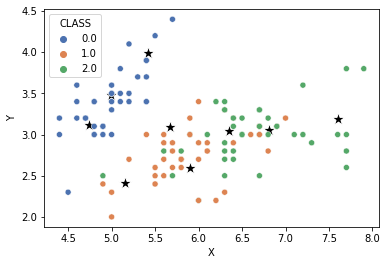

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[1, 0, 5, 2, 5, 3, 7, 5, 8, 6, 7, 4, 3, 6, 6, 3, 4, 2, 6, 4, 7, 6, 4, 8, 1, 4, 8, 7, 6, 5, 1, 2, 7, 7, 5, 5, 2, 7, 5, 2, 5, 5, 6, 6, 7, 1, 5, 0, 0, 8, 1, 6, 2, 6, 4, 1, 4, 8, 2, 1, 7, 6, 1, 2, 3, 3, 5, 5, 3, 8, 8, 4, 4, 0, 5, 5, 1, 2, 5, 7, 7, 4, 4, 4, 7, 6, 5, 5, 0, 8, 1, 2, 6, 6, 7, 0, 6, 8, 5, 4, 4, 4, 6, 8, 4, 1, 0, 4, 6, 4, 8, 1, 6, 7, 5, 3, 6, 1, 3, 5]
CENTROID AFTER EACH UPDATE
          X         Y
0  5.414286  3.985714
1  4.992308  3.484615
2  5.150000  2.410000
3  7.600000  3.187500
4  6.811111  3.050000
5  5.905000  2.595000
6  6.347368  3.042105
7  4.742857  3.114286
8  5.672727  3.090909


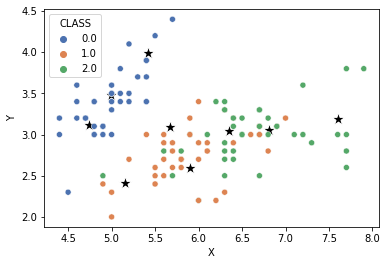

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[1, 0, 5, 2, 5, 3, 7, 5, 8, 6, 7, 4, 3, 6, 6, 3, 4, 2, 6, 4, 7, 6, 4, 8, 1, 4, 8, 7, 6, 5, 1, 2, 7, 7, 5, 5, 2, 7, 5, 2, 5, 5, 6, 6, 7, 1, 5, 0, 0, 8, 1, 6, 2, 6, 4, 1, 4, 8, 2, 1, 7, 6, 1, 2, 3, 3, 5, 5, 3, 8, 8, 4, 4, 0, 5, 5, 1, 2, 5, 7, 7, 4, 4, 4, 7, 6, 5, 5, 0, 8, 1, 2, 6, 6, 7, 0, 6, 8, 5, 4, 4, 4, 6, 8, 4, 1, 0, 4, 6, 4, 8, 1, 6, 7, 5, 3, 6, 1, 3, 5]
CENTROID AFTER EACH UPDATE
          X         Y
0  5.414286  3.985714
1  4.992308  3.484615
2  5.150000  2.410000
3  7.600000  3.187500
4  6.811111  3.050000
5  5.905000  2.595000
6  6.347368  3.042105
7  4.742857  3.114286
8  5.672727  3.090909


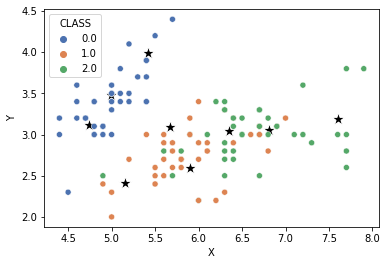

In [103]:
for i in range(10):
  get_centroids_1 = find_closest_centroid(np.array(centroids_1),X_train)
  print("THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE")
  print(get_centroids_1)
  centroids_1 = update_centroids(get_centroids_1, X_train)
  data_centroid_1 = pd.DataFrame(centroids_1)
  data_centroid_1.columns=['X','Y']
  print("CENTROID AFTER EACH UPDATE")
  print(data_centroid_1)
  sns.scatterplot(data = data_centroid_1, x="X",y="Y", color='black',marker='*',s=200)
  sns.scatterplot(data=data_X,x="SEPAL LENGTH",y="SEPAL WIDTH", palette='deep',hue= "CLASS")
  plt.show()

## **Finding the accuracy for (k=10)**

In [104]:
ref_label_1 = label_cluster(np.array(get_centroids_1),y_train)
pred_1 = find_closest_centroid(centroids_1,X_test)
actual_label_1 =[]
for i in range(len(pred_1)):
  actual_label_1.append(ref_label_1[pred_1[i]])
score_k_10 = accuracy_score(y_test,actual_label_1)
print("THE ACCURACY SCORE FOR K=10")
print(score_k_10)

THE ACCURACY SCORE FOR K=10
0.7666666666666667


## **Plotting of clusters after each iteration(for k=15)**

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[2, 2, 0, 0, 0, 4, 7, 8, 2, 13, 7, 10, 4, 10, 3, 4, 10, 9, 10, 5, 7, 10, 5, 8, 6, 5, 12, 7, 10, 0, 6, 9, 7, 7, 0, 9, 11, 7, 0, 11, 0, 8, 3, 10, 7, 6, 0, 2, 2, 8, 6, 10, 11, 10, 10, 2, 5, 1, 11, 7, 7, 13, 7, 9, 4, 5, 8, 10, 14, 8, 1, 10, 5, 2, 0, 0, 6, 12, 8, 7, 12, 5, 5, 5, 7, 13, 0, 0, 2, 8, 7, 11, 3, 10, 7, 2, 10, 12, 0, 5, 5, 5, 1, 8, 5, 6, 2, 5, 1, 5, 2, 6, 13, 12, 0, 4, 10, 6, 14, 0]
CENTROID AFTER EACH UPDATE
           X         Y
0   5.906667  2.553333
1   6.100000  3.350000
2   5.372727  3.781818
3   6.233333  3.200000
4   7.640000  3.300000
5   6.873333  3.133333
6   5.037500  3.500000
7   4.713333  3.200000
8   5.755556  2.866667
9   5.525000  2.450000
10  6.446667  2.846667
11  4.860000  2.300000
12  5.220000  2.940000
13  6.425000  3.175000
14  7.700000  2.700000


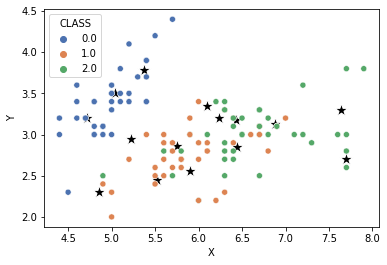

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[6, 2, 0, 9, 0, 4, 7, 8, 6, 13, 7, 5, 4, 10, 3, 4, 5, 9, 10, 5, 7, 10, 5, 8, 6, 5, 12, 7, 10, 0, 6, 9, 7, 7, 8, 9, 11, 7, 0, 11, 0, 8, 3, 10, 7, 6, 9, 2, 2, 8, 6, 10, 11, 3, 10, 6, 5, 1, 11, 7, 7, 13, 7, 9, 14, 4, 8, 10, 14, 8, 1, 10, 5, 2, 0, 0, 2, 12, 8, 7, 12, 5, 5, 5, 7, 13, 8, 8, 2, 8, 7, 11, 3, 10, 7, 2, 10, 8, 0, 5, 5, 5, 1, 8, 5, 6, 2, 5, 1, 5, 6, 6, 13, 7, 8, 14, 10, 6, 14, 0]
CENTROID AFTER EACH UPDATE
           X         Y
0   6.022222  2.488889
1   6.100000  3.350000
2   5.375000  3.962500
3   6.200000  3.125000
4   7.600000  3.550000
5   6.831250  3.087500
6   5.127273  3.445455
7   4.725000  3.187500
8   5.757143  2.828571
9   5.550000  2.483333
10  6.433333  2.816667
11  4.860000  2.300000
12  5.200000  2.900000
13  6.425000  3.175000
14  7.600000  2.825000


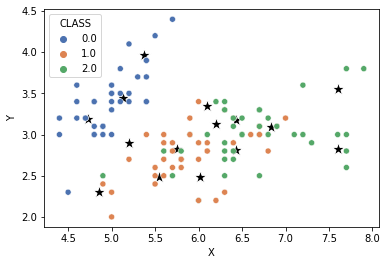

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[6, 2, 0, 9, 0, 4, 7, 8, 6, 13, 7, 5, 4, 10, 3, 14, 5, 9, 13, 5, 7, 10, 5, 8, 6, 5, 12, 7, 10, 0, 6, 9, 7, 7, 8, 9, 11, 7, 8, 11, 9, 8, 13, 13, 7, 6, 9, 2, 2, 8, 6, 10, 11, 3, 10, 6, 5, 1, 11, 7, 7, 13, 7, 9, 14, 4, 8, 0, 14, 8, 1, 5, 5, 2, 0, 0, 2, 12, 8, 7, 12, 5, 5, 5, 7, 13, 8, 8, 2, 8, 7, 11, 13, 10, 7, 2, 13, 8, 0, 5, 5, 5, 1, 8, 5, 6, 2, 5, 1, 5, 6, 6, 13, 7, 8, 14, 10, 6, 14, 0]
CENTROID AFTER EACH UPDATE
           X         Y
0   6.125000  2.462500
1   6.100000  3.350000
2   5.375000  3.962500
3   6.100000  2.950000
4   7.600000  3.733333
5   6.817647  3.082353
6   5.127273  3.445455
7   4.725000  3.187500
8   5.760000  2.813333
9   5.571429  2.500000
10  6.400000  2.757143
11  4.860000  2.300000
12  5.200000  2.900000
13  6.422222  3.144444
14  7.600000  2.860000


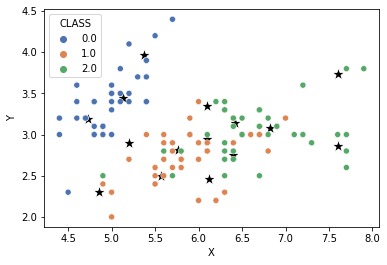

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[6, 2, 8, 9, 0, 4, 7, 3, 6, 13, 7, 5, 4, 10, 3, 14, 5, 9, 13, 5, 7, 10, 5, 8, 6, 5, 12, 7, 10, 3, 6, 9, 7, 7, 8, 9, 11, 7, 8, 11, 9, 8, 13, 13, 7, 6, 9, 2, 2, 8, 6, 10, 11, 3, 10, 6, 5, 1, 11, 7, 7, 13, 7, 9, 14, 4, 8, 0, 14, 8, 1, 13, 5, 2, 0, 0, 2, 12, 8, 7, 12, 5, 5, 5, 7, 13, 8, 8, 2, 3, 7, 11, 13, 10, 7, 2, 13, 8, 0, 5, 5, 5, 1, 3, 5, 6, 2, 5, 1, 5, 6, 6, 13, 7, 8, 14, 10, 6, 14, 3]
CENTROID AFTER EACH UPDATE
           X         Y
0   6.160000  2.280000
1   6.100000  3.350000
2   5.375000  3.962500
3   6.028571  2.914286
4   7.600000  3.733333
5   6.831250  3.087500
6   5.127273  3.445455
7   4.725000  3.187500
8   5.738462  2.769231
9   5.571429  2.500000
10  6.400000  2.757143
11  4.860000  2.300000
12  5.200000  2.900000
13  6.440000  3.130000
14  7.600000  2.860000


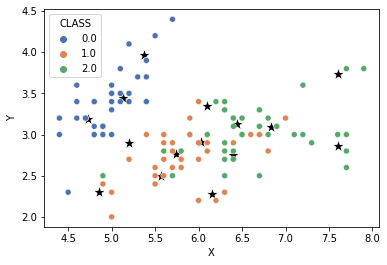

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[6, 2, 3, 9, 0, 4, 7, 3, 6, 13, 7, 5, 4, 10, 3, 14, 5, 9, 13, 5, 7, 10, 5, 8, 6, 5, 12, 7, 10, 3, 6, 9, 7, 7, 8, 9, 11, 7, 8, 11, 9, 8, 1, 13, 7, 6, 9, 2, 2, 8, 6, 10, 11, 3, 10, 6, 5, 1, 11, 7, 7, 13, 7, 9, 14, 4, 8, 0, 14, 8, 1, 13, 5, 2, 0, 0, 2, 12, 8, 7, 12, 5, 5, 5, 7, 13, 8, 8, 2, 3, 7, 11, 1, 10, 7, 2, 13, 8, 0, 5, 5, 5, 1, 3, 5, 6, 2, 5, 1, 5, 6, 6, 13, 7, 8, 14, 10, 6, 14, 3]
CENTROID AFTER EACH UPDATE
           X         Y
0   6.160000  2.280000
1   6.166667  3.333333
2   5.375000  3.962500
3   6.025000  2.887500
4   7.600000  3.733333
5   6.831250  3.087500
6   5.127273  3.445455
7   4.725000  3.187500
8   5.716667  2.775000
9   5.571429  2.500000
10  6.400000  2.757143
11  4.860000  2.300000
12  5.200000  2.900000
13  6.475000  3.087500
14  7.600000  2.860000


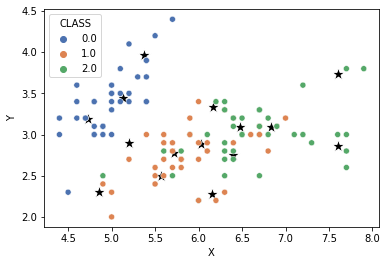

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[6, 2, 3, 9, 0, 4, 7, 3, 6, 13, 7, 5, 4, 10, 3, 14, 5, 9, 13, 5, 7, 10, 5, 8, 6, 5, 12, 7, 10, 3, 6, 9, 7, 7, 8, 9, 11, 7, 8, 11, 9, 8, 1, 13, 7, 6, 9, 2, 2, 8, 6, 10, 11, 3, 10, 6, 5, 1, 11, 7, 7, 13, 7, 9, 14, 4, 8, 0, 14, 8, 1, 13, 5, 2, 0, 0, 2, 12, 8, 7, 12, 5, 5, 5, 7, 13, 8, 8, 2, 3, 7, 11, 1, 10, 7, 2, 13, 8, 0, 5, 5, 5, 1, 3, 5, 6, 2, 5, 1, 5, 6, 6, 13, 7, 8, 14, 10, 6, 14, 3]
CENTROID AFTER EACH UPDATE
           X         Y
0   6.160000  2.280000
1   6.166667  3.333333
2   5.375000  3.962500
3   6.025000  2.887500
4   7.600000  3.733333
5   6.831250  3.087500
6   5.127273  3.445455
7   4.725000  3.187500
8   5.716667  2.775000
9   5.571429  2.500000
10  6.400000  2.757143
11  4.860000  2.300000
12  5.200000  2.900000
13  6.475000  3.087500
14  7.600000  2.860000


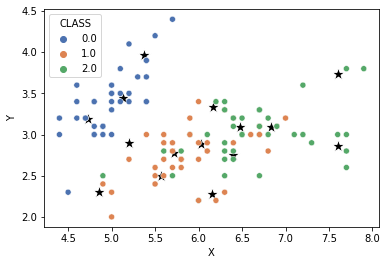

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[6, 2, 3, 9, 0, 4, 7, 3, 6, 13, 7, 5, 4, 10, 3, 14, 5, 9, 13, 5, 7, 10, 5, 8, 6, 5, 12, 7, 10, 3, 6, 9, 7, 7, 8, 9, 11, 7, 8, 11, 9, 8, 1, 13, 7, 6, 9, 2, 2, 8, 6, 10, 11, 3, 10, 6, 5, 1, 11, 7, 7, 13, 7, 9, 14, 4, 8, 0, 14, 8, 1, 13, 5, 2, 0, 0, 2, 12, 8, 7, 12, 5, 5, 5, 7, 13, 8, 8, 2, 3, 7, 11, 1, 10, 7, 2, 13, 8, 0, 5, 5, 5, 1, 3, 5, 6, 2, 5, 1, 5, 6, 6, 13, 7, 8, 14, 10, 6, 14, 3]
CENTROID AFTER EACH UPDATE
           X         Y
0   6.160000  2.280000
1   6.166667  3.333333
2   5.375000  3.962500
3   6.025000  2.887500
4   7.600000  3.733333
5   6.831250  3.087500
6   5.127273  3.445455
7   4.725000  3.187500
8   5.716667  2.775000
9   5.571429  2.500000
10  6.400000  2.757143
11  4.860000  2.300000
12  5.200000  2.900000
13  6.475000  3.087500
14  7.600000  2.860000


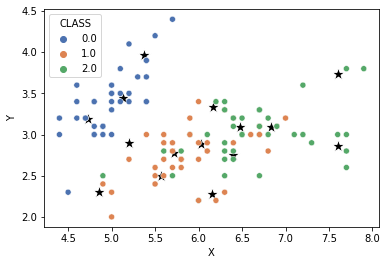

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[6, 2, 3, 9, 0, 4, 7, 3, 6, 13, 7, 5, 4, 10, 3, 14, 5, 9, 13, 5, 7, 10, 5, 8, 6, 5, 12, 7, 10, 3, 6, 9, 7, 7, 8, 9, 11, 7, 8, 11, 9, 8, 1, 13, 7, 6, 9, 2, 2, 8, 6, 10, 11, 3, 10, 6, 5, 1, 11, 7, 7, 13, 7, 9, 14, 4, 8, 0, 14, 8, 1, 13, 5, 2, 0, 0, 2, 12, 8, 7, 12, 5, 5, 5, 7, 13, 8, 8, 2, 3, 7, 11, 1, 10, 7, 2, 13, 8, 0, 5, 5, 5, 1, 3, 5, 6, 2, 5, 1, 5, 6, 6, 13, 7, 8, 14, 10, 6, 14, 3]
CENTROID AFTER EACH UPDATE
           X         Y
0   6.160000  2.280000
1   6.166667  3.333333
2   5.375000  3.962500
3   6.025000  2.887500
4   7.600000  3.733333
5   6.831250  3.087500
6   5.127273  3.445455
7   4.725000  3.187500
8   5.716667  2.775000
9   5.571429  2.500000
10  6.400000  2.757143
11  4.860000  2.300000
12  5.200000  2.900000
13  6.475000  3.087500
14  7.600000  2.860000


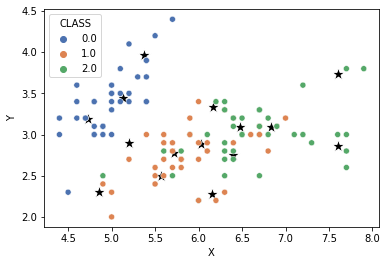

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[6, 2, 3, 9, 0, 4, 7, 3, 6, 13, 7, 5, 4, 10, 3, 14, 5, 9, 13, 5, 7, 10, 5, 8, 6, 5, 12, 7, 10, 3, 6, 9, 7, 7, 8, 9, 11, 7, 8, 11, 9, 8, 1, 13, 7, 6, 9, 2, 2, 8, 6, 10, 11, 3, 10, 6, 5, 1, 11, 7, 7, 13, 7, 9, 14, 4, 8, 0, 14, 8, 1, 13, 5, 2, 0, 0, 2, 12, 8, 7, 12, 5, 5, 5, 7, 13, 8, 8, 2, 3, 7, 11, 1, 10, 7, 2, 13, 8, 0, 5, 5, 5, 1, 3, 5, 6, 2, 5, 1, 5, 6, 6, 13, 7, 8, 14, 10, 6, 14, 3]
CENTROID AFTER EACH UPDATE
           X         Y
0   6.160000  2.280000
1   6.166667  3.333333
2   5.375000  3.962500
3   6.025000  2.887500
4   7.600000  3.733333
5   6.831250  3.087500
6   5.127273  3.445455
7   4.725000  3.187500
8   5.716667  2.775000
9   5.571429  2.500000
10  6.400000  2.757143
11  4.860000  2.300000
12  5.200000  2.900000
13  6.475000  3.087500
14  7.600000  2.860000


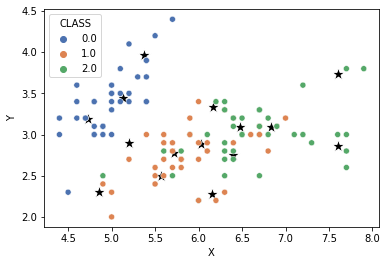

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[6, 2, 3, 9, 0, 4, 7, 3, 6, 13, 7, 5, 4, 10, 3, 14, 5, 9, 13, 5, 7, 10, 5, 8, 6, 5, 12, 7, 10, 3, 6, 9, 7, 7, 8, 9, 11, 7, 8, 11, 9, 8, 1, 13, 7, 6, 9, 2, 2, 8, 6, 10, 11, 3, 10, 6, 5, 1, 11, 7, 7, 13, 7, 9, 14, 4, 8, 0, 14, 8, 1, 13, 5, 2, 0, 0, 2, 12, 8, 7, 12, 5, 5, 5, 7, 13, 8, 8, 2, 3, 7, 11, 1, 10, 7, 2, 13, 8, 0, 5, 5, 5, 1, 3, 5, 6, 2, 5, 1, 5, 6, 6, 13, 7, 8, 14, 10, 6, 14, 3]
CENTROID AFTER EACH UPDATE
           X         Y
0   6.160000  2.280000
1   6.166667  3.333333
2   5.375000  3.962500
3   6.025000  2.887500
4   7.600000  3.733333
5   6.831250  3.087500
6   5.127273  3.445455
7   4.725000  3.187500
8   5.716667  2.775000
9   5.571429  2.500000
10  6.400000  2.757143
11  4.860000  2.300000
12  5.200000  2.900000
13  6.475000  3.087500
14  7.600000  2.860000


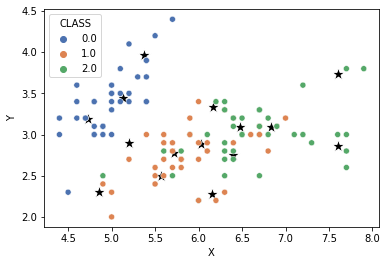

In [105]:
for i in range(10):
  get_centroids_2 = find_closest_centroid(centroids_2,X_train)
  print("THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE")
  print(get_centroids_2)
  centroids_2 = update_centroids(get_centroids_2, X_train)
  data_centroid_2 = pd.DataFrame(centroids_2)
  data_centroid_2.columns=['X','Y']
  print("CENTROID AFTER EACH UPDATE")
  print(data_centroid_2)
  sns.scatterplot(data = data_centroid_2, x="X",y="Y", color='black',marker='*',s=200)
  sns.scatterplot(data=data_X,x="SEPAL LENGTH",y="SEPAL WIDTH", palette='deep',hue= "CLASS")
  plt.show()

## **Finding the accuracy for (k=15)**

In [106]:
ref_label_2 = label_cluster(np.array(get_centroids_2),y_train)
pred_2 = find_closest_centroid(centroids_2,X_test)
actual_label_2 =[]
for i in range(len(pred_2)):
  actual_label_2.append(ref_label_2[pred_2[i]])
score_k_15 = accuracy_score(y_test,actual_label_2)
print("THE ACCURACY SCORE FOR K=15")
print(score_k_15)

THE ACCURACY SCORE FOR K=15
0.8333333333333334


## **Plotting of clusters after each iteration(for k=20)**

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[12, 7, 9, 11, 2, 17, 10, 9, 7, 8, 10, 13, 17, 2, 9, 6, 13, 14, 13, 13, 10, 2, 6, 1, 12, 4, 18, 10, 2, 9, 12, 14, 10, 10, 15, 11, 19, 10, 15, 19, 15, 11, 8, 13, 12, 12, 15, 7, 16, 1, 12, 2, 19, 9, 2, 12, 5, 3, 19, 12, 10, 8, 12, 11, 6, 17, 1, 2, 6, 1, 3, 13, 5, 16, 14, 2, 7, 18, 1, 10, 10, 4, 4, 13, 10, 8, 15, 15, 16, 0, 12, 19, 8, 2, 10, 7, 13, 1, 14, 13, 4, 4, 8, 0, 13, 12, 7, 5, 8, 13, 7, 12, 8, 10, 15, 6, 2, 12, 6, 9]
CENTROID AFTER EACH UPDATE
           X         Y
0   5.900000  3.000000
1   5.666667  2.866667
2   6.360000  2.630000
3   5.950000  3.300000
4   6.960000  3.100000
5   6.733333  3.266667
6   7.533333  2.883333
7   5.342857  3.685714
8   6.350000  3.262500
9   6.066667  2.850000
10  4.753846  3.092308
11  5.550000  2.575000
12  4.953846  3.453846
13  6.654545  3.009091
14  5.750000  2.300000
15  5.771429  2.642857
16  5.466667  4.233333
17  7.600000  3.733333
18  5.300000  2.850000
19  4.860000  2.300000


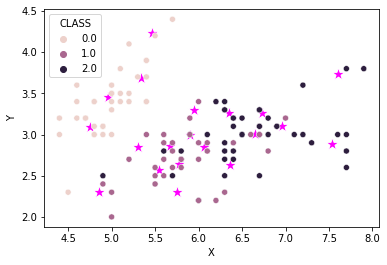

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[7, 7, 9, 11, 2, 17, 10, 9, 7, 8, 10, 13, 17, 2, 9, 6, 13, 11, 13, 13, 10, 2, 4, 1, 12, 4, 18, 10, 2, 9, 12, 11, 10, 10, 15, 11, 19, 10, 15, 19, 15, 11, 8, 13, 10, 12, 15, 7, 16, 1, 12, 2, 19, 9, 2, 12, 5, 3, 19, 12, 10, 8, 12, 11, 6, 17, 1, 2, 6, 1, 3, 13, 5, 16, 14, 2, 7, 18, 1, 10, 10, 4, 4, 13, 10, 8, 15, 15, 16, 0, 12, 19, 8, 2, 10, 7, 13, 1, 14, 13, 4, 4, 8, 0, 13, 12, 7, 5, 8, 13, 7, 12, 8, 10, 15, 6, 9, 12, 6, 9]
CENTROID AFTER EACH UPDATE
           X         Y
0   5.900000  3.000000
1   5.666667  2.866667
2   6.366667  2.600000
3   5.950000  3.300000
4   7.000000  3.083333
5   6.733333  3.266667
6   7.600000  2.860000
7   5.325000  3.662500
8   6.350000  3.262500
9   6.100000  2.857143
10  4.742857  3.114286
11  5.533333  2.516667
12  4.963636  3.454545
13  6.654545  3.009091
14  6.000000  2.200000
15  5.771429  2.642857
16  5.466667  4.233333
17  7.600000  3.733333
18  5.300000  2.850000
19  4.860000  2.300000


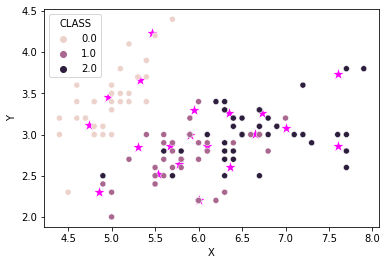

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[7, 7, 9, 11, 2, 17, 10, 9, 7, 8, 10, 13, 17, 2, 9, 6, 13, 11, 13, 13, 10, 2, 4, 1, 12, 4, 18, 10, 2, 9, 12, 11, 10, 10, 15, 11, 19, 10, 15, 19, 15, 1, 8, 13, 10, 12, 15, 7, 16, 1, 12, 9, 19, 9, 2, 12, 5, 3, 19, 12, 10, 8, 12, 11, 6, 17, 1, 2, 6, 1, 3, 13, 5, 16, 14, 14, 7, 18, 1, 10, 10, 4, 4, 13, 10, 8, 15, 15, 16, 0, 12, 19, 8, 13, 10, 7, 13, 1, 14, 13, 4, 4, 8, 0, 13, 12, 7, 5, 8, 13, 7, 12, 8, 10, 15, 6, 9, 12, 6, 9]
CENTROID AFTER EACH UPDATE
           X         Y
0   5.900000  3.000000
1   5.657143  2.842857
2   6.400000  2.583333
3   5.950000  3.300000
4   7.000000  3.083333
5   6.733333  3.266667
6   7.600000  2.860000
7   5.325000  3.662500
8   6.350000  3.262500
9   6.125000  2.850000
10  4.742857  3.114286
11  5.520000  2.480000
12  4.963636  3.454545
13  6.633333  3.000000
14  6.066667  2.200000
15  5.771429  2.642857
16  5.466667  4.233333
17  7.600000  3.733333
18  5.300000  2.850000
19  4.860000  2.300000


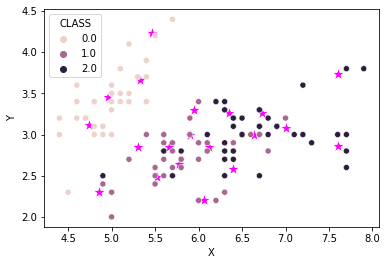

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[7, 7, 9, 11, 14, 17, 10, 9, 7, 8, 10, 13, 17, 2, 9, 6, 13, 11, 13, 13, 10, 2, 4, 1, 12, 4, 18, 10, 2, 9, 12, 11, 10, 10, 15, 11, 19, 10, 15, 19, 15, 1, 8, 13, 10, 12, 15, 7, 16, 1, 12, 9, 19, 9, 2, 12, 5, 3, 19, 12, 10, 8, 12, 11, 6, 17, 1, 2, 6, 1, 3, 13, 5, 16, 14, 14, 7, 18, 1, 10, 10, 4, 4, 13, 10, 8, 15, 15, 16, 0, 12, 19, 8, 13, 10, 7, 13, 1, 14, 13, 4, 4, 8, 0, 13, 12, 7, 5, 8, 13, 7, 12, 8, 10, 15, 6, 9, 12, 6, 9]
CENTROID AFTER EACH UPDATE
           X         Y
0   5.900000  3.000000
1   5.657143  2.842857
2   6.420000  2.640000
3   5.950000  3.300000
4   7.000000  3.083333
5   6.733333  3.266667
6   7.600000  2.860000
7   5.325000  3.662500
8   6.350000  3.262500
9   6.125000  2.850000
10  4.742857  3.114286
11  5.520000  2.480000
12  4.963636  3.454545
13  6.633333  3.000000
14  6.125000  2.225000
15  5.771429  2.642857
16  5.466667  4.233333
17  7.600000  3.733333
18  5.300000  2.850000
19  4.860000  2.300000


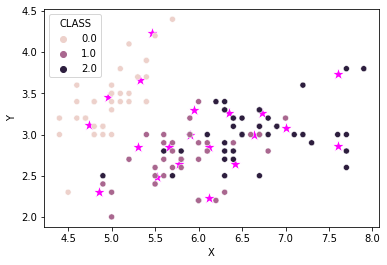

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[7, 7, 9, 11, 14, 17, 10, 9, 7, 8, 10, 13, 17, 2, 9, 6, 13, 11, 13, 13, 10, 2, 4, 1, 12, 4, 18, 10, 2, 9, 12, 11, 10, 10, 15, 11, 19, 10, 15, 19, 15, 1, 8, 13, 10, 12, 15, 7, 16, 1, 12, 9, 19, 9, 2, 12, 5, 3, 19, 12, 10, 8, 12, 11, 6, 17, 1, 2, 6, 1, 3, 13, 5, 16, 14, 14, 7, 18, 1, 10, 10, 4, 4, 13, 10, 8, 15, 15, 16, 0, 12, 19, 8, 13, 10, 7, 13, 1, 14, 13, 4, 4, 8, 0, 13, 12, 7, 5, 8, 13, 7, 12, 8, 10, 15, 6, 9, 12, 6, 9]
CENTROID AFTER EACH UPDATE
           X         Y
0   5.900000  3.000000
1   5.657143  2.842857
2   6.420000  2.640000
3   5.950000  3.300000
4   7.000000  3.083333
5   6.733333  3.266667
6   7.600000  2.860000
7   5.325000  3.662500
8   6.350000  3.262500
9   6.125000  2.850000
10  4.742857  3.114286
11  5.520000  2.480000
12  4.963636  3.454545
13  6.633333  3.000000
14  6.125000  2.225000
15  5.771429  2.642857
16  5.466667  4.233333
17  7.600000  3.733333
18  5.300000  2.850000
19  4.860000  2.300000


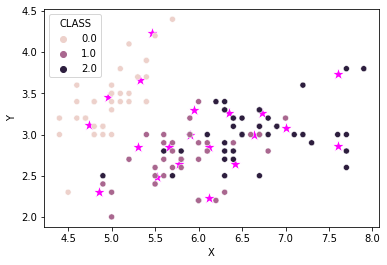

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[7, 7, 9, 11, 14, 17, 10, 9, 7, 8, 10, 13, 17, 2, 9, 6, 13, 11, 13, 13, 10, 2, 4, 1, 12, 4, 18, 10, 2, 9, 12, 11, 10, 10, 15, 11, 19, 10, 15, 19, 15, 1, 8, 13, 10, 12, 15, 7, 16, 1, 12, 9, 19, 9, 2, 12, 5, 3, 19, 12, 10, 8, 12, 11, 6, 17, 1, 2, 6, 1, 3, 13, 5, 16, 14, 14, 7, 18, 1, 10, 10, 4, 4, 13, 10, 8, 15, 15, 16, 0, 12, 19, 8, 13, 10, 7, 13, 1, 14, 13, 4, 4, 8, 0, 13, 12, 7, 5, 8, 13, 7, 12, 8, 10, 15, 6, 9, 12, 6, 9]
CENTROID AFTER EACH UPDATE
           X         Y
0   5.900000  3.000000
1   5.657143  2.842857
2   6.420000  2.640000
3   5.950000  3.300000
4   7.000000  3.083333
5   6.733333  3.266667
6   7.600000  2.860000
7   5.325000  3.662500
8   6.350000  3.262500
9   6.125000  2.850000
10  4.742857  3.114286
11  5.520000  2.480000
12  4.963636  3.454545
13  6.633333  3.000000
14  6.125000  2.225000
15  5.771429  2.642857
16  5.466667  4.233333
17  7.600000  3.733333
18  5.300000  2.850000
19  4.860000  2.300000


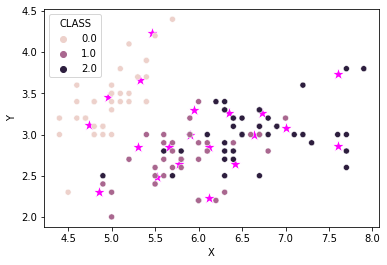

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[7, 7, 9, 11, 14, 17, 10, 9, 7, 8, 10, 13, 17, 2, 9, 6, 13, 11, 13, 13, 10, 2, 4, 1, 12, 4, 18, 10, 2, 9, 12, 11, 10, 10, 15, 11, 19, 10, 15, 19, 15, 1, 8, 13, 10, 12, 15, 7, 16, 1, 12, 9, 19, 9, 2, 12, 5, 3, 19, 12, 10, 8, 12, 11, 6, 17, 1, 2, 6, 1, 3, 13, 5, 16, 14, 14, 7, 18, 1, 10, 10, 4, 4, 13, 10, 8, 15, 15, 16, 0, 12, 19, 8, 13, 10, 7, 13, 1, 14, 13, 4, 4, 8, 0, 13, 12, 7, 5, 8, 13, 7, 12, 8, 10, 15, 6, 9, 12, 6, 9]
CENTROID AFTER EACH UPDATE
           X         Y
0   5.900000  3.000000
1   5.657143  2.842857
2   6.420000  2.640000
3   5.950000  3.300000
4   7.000000  3.083333
5   6.733333  3.266667
6   7.600000  2.860000
7   5.325000  3.662500
8   6.350000  3.262500
9   6.125000  2.850000
10  4.742857  3.114286
11  5.520000  2.480000
12  4.963636  3.454545
13  6.633333  3.000000
14  6.125000  2.225000
15  5.771429  2.642857
16  5.466667  4.233333
17  7.600000  3.733333
18  5.300000  2.850000
19  4.860000  2.300000


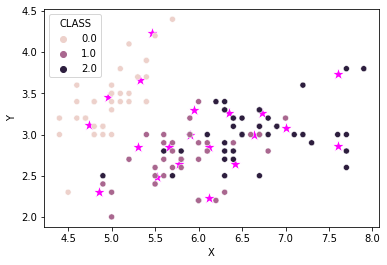

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[7, 7, 9, 11, 14, 17, 10, 9, 7, 8, 10, 13, 17, 2, 9, 6, 13, 11, 13, 13, 10, 2, 4, 1, 12, 4, 18, 10, 2, 9, 12, 11, 10, 10, 15, 11, 19, 10, 15, 19, 15, 1, 8, 13, 10, 12, 15, 7, 16, 1, 12, 9, 19, 9, 2, 12, 5, 3, 19, 12, 10, 8, 12, 11, 6, 17, 1, 2, 6, 1, 3, 13, 5, 16, 14, 14, 7, 18, 1, 10, 10, 4, 4, 13, 10, 8, 15, 15, 16, 0, 12, 19, 8, 13, 10, 7, 13, 1, 14, 13, 4, 4, 8, 0, 13, 12, 7, 5, 8, 13, 7, 12, 8, 10, 15, 6, 9, 12, 6, 9]
CENTROID AFTER EACH UPDATE
           X         Y
0   5.900000  3.000000
1   5.657143  2.842857
2   6.420000  2.640000
3   5.950000  3.300000
4   7.000000  3.083333
5   6.733333  3.266667
6   7.600000  2.860000
7   5.325000  3.662500
8   6.350000  3.262500
9   6.125000  2.850000
10  4.742857  3.114286
11  5.520000  2.480000
12  4.963636  3.454545
13  6.633333  3.000000
14  6.125000  2.225000
15  5.771429  2.642857
16  5.466667  4.233333
17  7.600000  3.733333
18  5.300000  2.850000
19  4.860000  2.300000


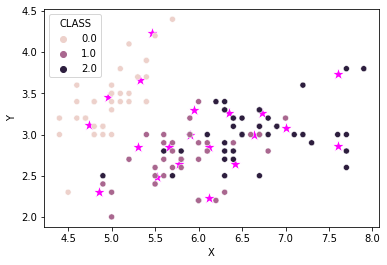

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[7, 7, 9, 11, 14, 17, 10, 9, 7, 8, 10, 13, 17, 2, 9, 6, 13, 11, 13, 13, 10, 2, 4, 1, 12, 4, 18, 10, 2, 9, 12, 11, 10, 10, 15, 11, 19, 10, 15, 19, 15, 1, 8, 13, 10, 12, 15, 7, 16, 1, 12, 9, 19, 9, 2, 12, 5, 3, 19, 12, 10, 8, 12, 11, 6, 17, 1, 2, 6, 1, 3, 13, 5, 16, 14, 14, 7, 18, 1, 10, 10, 4, 4, 13, 10, 8, 15, 15, 16, 0, 12, 19, 8, 13, 10, 7, 13, 1, 14, 13, 4, 4, 8, 0, 13, 12, 7, 5, 8, 13, 7, 12, 8, 10, 15, 6, 9, 12, 6, 9]
CENTROID AFTER EACH UPDATE
           X         Y
0   5.900000  3.000000
1   5.657143  2.842857
2   6.420000  2.640000
3   5.950000  3.300000
4   7.000000  3.083333
5   6.733333  3.266667
6   7.600000  2.860000
7   5.325000  3.662500
8   6.350000  3.262500
9   6.125000  2.850000
10  4.742857  3.114286
11  5.520000  2.480000
12  4.963636  3.454545
13  6.633333  3.000000
14  6.125000  2.225000
15  5.771429  2.642857
16  5.466667  4.233333
17  7.600000  3.733333
18  5.300000  2.850000
19  4.860000  2.300000


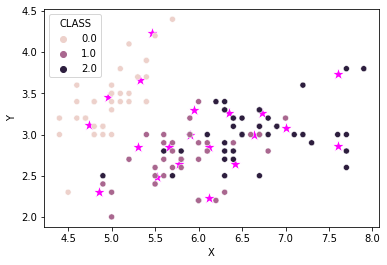

THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE
[7, 7, 9, 11, 14, 17, 10, 9, 7, 8, 10, 13, 17, 2, 9, 6, 13, 11, 13, 13, 10, 2, 4, 1, 12, 4, 18, 10, 2, 9, 12, 11, 10, 10, 15, 11, 19, 10, 15, 19, 15, 1, 8, 13, 10, 12, 15, 7, 16, 1, 12, 9, 19, 9, 2, 12, 5, 3, 19, 12, 10, 8, 12, 11, 6, 17, 1, 2, 6, 1, 3, 13, 5, 16, 14, 14, 7, 18, 1, 10, 10, 4, 4, 13, 10, 8, 15, 15, 16, 0, 12, 19, 8, 13, 10, 7, 13, 1, 14, 13, 4, 4, 8, 0, 13, 12, 7, 5, 8, 13, 7, 12, 8, 10, 15, 6, 9, 12, 6, 9]
CENTROID AFTER EACH UPDATE
           X         Y
0   5.900000  3.000000
1   5.657143  2.842857
2   6.420000  2.640000
3   5.950000  3.300000
4   7.000000  3.083333
5   6.733333  3.266667
6   7.600000  2.860000
7   5.325000  3.662500
8   6.350000  3.262500
9   6.125000  2.850000
10  4.742857  3.114286
11  5.520000  2.480000
12  4.963636  3.454545
13  6.633333  3.000000
14  6.125000  2.225000
15  5.771429  2.642857
16  5.466667  4.233333
17  7.600000  3.733333
18  5.300000  2.850000
19  4.860000  2.300000


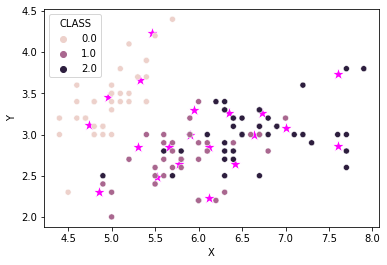

In [107]:
for i in range(10):
  get_centroids_3 = find_closest_centroid(centroids_3,X_train)
  print("THE ASSIGNING OF CENTROIDS AFTER EACH UPDATE")
  print(get_centroids_3)
  centroids_3 = update_centroids(get_centroids_3, X_train)
  data_centroid_3 = pd.DataFrame(centroids_3)
  data_centroid_3.columns=['X','Y']
  print("CENTROID AFTER EACH UPDATE")
  print(data_centroid_3)
  sns.scatterplot(data = data_centroid_3, x="X",y="Y", color='magenta',marker='*',s=200)
  sns.scatterplot(data=data_X,x="SEPAL LENGTH",y="SEPAL WIDTH",hue= "CLASS")
  plt.show()

## **Finding the accuracy for (k=20)**

In [108]:
ref_label_3 = label_cluster(np.array(get_centroids_3),y_train)
pred_3 = find_closest_centroid(centroids_3,X_test)
actual_label_3 =[]
for i in range(len(pred_3)):
  actual_label_3.append(ref_label_3[pred_3[i]])
score_k_20 = accuracy_score(y_test,actual_label_3)
print("THE ACCURACY SCORE FOR K=20")
print(score_k_20)

THE ACCURACY SCORE FOR K=20
0.8333333333333334


### **EXTRA ANALYSIS**

## **Testing on iris dataset (SKLEARN IMPLEMENTATION)**

## **Labelling of clusters based on model**

In [109]:
def label_cluster_sklearn(get_centroids,y_train,model):
  
  actual_labels = {}
  for i in range(len(np.unique(get_centroids))):
    index = np.where(get_centroids == i,1,0)
    num = np.bincount(y_train[index==1].astype('int64')).argmax()
    actual_labels[i] = num
  #print(index)
  return actual_labels

## **Fitting of K-Means model**

In [110]:
score_sk_10 = []
score_sk_15 = []
score_sk_20 = []
cluster_k_10 = KMeans(n_clusters = 10,n_jobs=-1,max_iter=10)
cluster_k_15 = KMeans(n_clusters = 15,n_jobs=-1,max_iter=10)
cluster_k_20 = KMeans(n_clusters = 20,n_jobs=-1,max_iter=10)
cluster_k_10.fit(X_train)
cluster_k_15.fit(X_train)
cluster_k_20.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=20, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## **Assigning actual labels**

In [111]:
ref_label_sk_1 = label_cluster_sklearn(cluster_k_10.labels_,y_train,cluster_k_10)
ref_label_sk_2 = label_cluster_sklearn(cluster_k_15.labels_,y_train,cluster_k_15)
ref_label_sk_3 = label_cluster_sklearn(cluster_k_20.labels_,y_train,cluster_k_20)

## **Predicting the model**

In [112]:
pred_sk_1 = cluster_k_10.predict(X_test)
pred_sk_2 = cluster_k_15.predict(X_test)
pred_sk_3 = cluster_k_20.predict(X_test)

## **Finding Accuracy Score for each model**

In [113]:
actual_label_1_sk=[]
actual_label_2_sk=[]
actual_label_3_sk=[]
for i1 in range(len(pred_sk_1)):
  actual_label_1_sk.append(ref_label_sk_1[pred_sk_1[i1]])
for i2 in range(len(pred_sk_2)):
  actual_label_2_sk.append(ref_label_sk_2[pred_sk_2[i2]])
for i3 in range(len(pred_sk_3)):
  actual_label_3_sk.append(ref_label_sk_3[pred_sk_3[i3]])
score_sk_10 = accuracy_score(y_test,actual_label_1_sk)
score_sk_15 = accuracy_score(y_test,actual_label_2_sk)
score_sk_20 = accuracy_score(y_test,actual_label_3_sk)

## **Plot of clusters for (k=10) after final iteration**

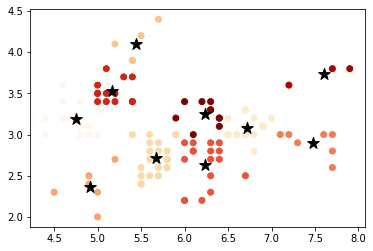

In [114]:
plt.scatter(X_train[:,0], X_train[:,1], c=cluster_k_10.labels_, cmap='OrRd')
plt.scatter(cluster_k_10.cluster_centers_[:,0] ,cluster_k_10.cluster_centers_[:,1], color='black',marker='*',s=150)

## **Plot of clusters for (k=15) after final iteration**

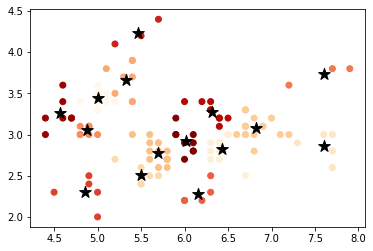

In [115]:
plt.scatter(X_train[:,0], X_train[:,1], c=cluster_k_15.labels_, cmap='OrRd')
plt.scatter(cluster_k_15.cluster_centers_[:,0] ,cluster_k_15.cluster_centers_[:,1], color='black',marker='*',s=150)

## **Plot of clusters for (k=20) after final iteration**

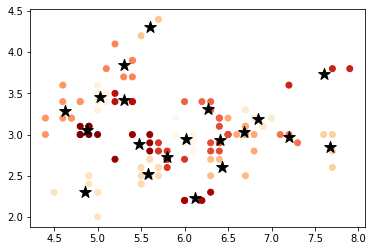

In [116]:
plt.scatter(X_train[:,0], X_train[:,1], c=cluster_k_20.labels_, cmap='OrRd')
plt.scatter(cluster_k_20.cluster_centers_[:,0] ,cluster_k_20.cluster_centers_[:,1], color='black',marker='*',s=150)

## **Print accuracy score for each model**

In [117]:
print("THE ACCURACY SCORE FOR K=10")
print(score_sk_10)

print("THE ACCURACY SCORE FOR K=15")
print(score_sk_15)

print("THE ACCURACY SCORE FOR K=20")
print(score_sk_20)

THE ACCURACY SCORE FOR K=10
0.8333333333333334
THE ACCURACY SCORE FOR K=15
0.8333333333333334
THE ACCURACY SCORE FOR K=20
0.8666666666666667


## **COMPARISON OF SCRATCH MODELS SCORE WITH SKLEARN MODELS SCORE**

In [118]:
scratch_model = [score_k_10,score_k_15,score_k_20]
sklearn_model = [score_sk_10,score_sk_15,score_sk_20]
data_model = pd.DataFrame(scratch_model)
data_model.columns=['SCRATCH MODEL']
data_model['SKLEARN MODEL']= sklearn_model
data_model.index = ['K=10','K=15','K=20']
# sns.boxplot(data_model)
data_model

,SCRATCH MODEL,SKLEARN MODEL
K=10,0.766667,0.833333
K=15,0.833333,0.833333
K=20,0.833333,0.866667


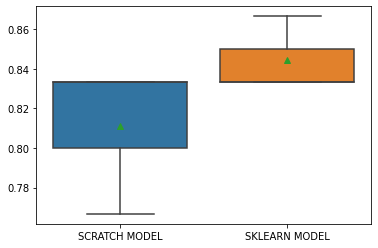

In [119]:
sns.boxplot(data=data_model,showmeans = True)

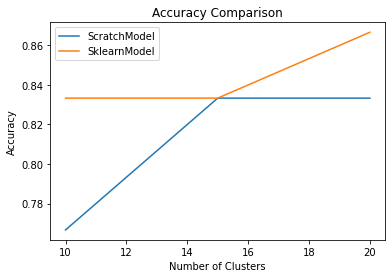

In [120]:
k = [10,15,20]

plt.plot(k,scratch_model)
plt.plot(k,sklearn_model)
plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy')
plt.legend(labels = ['ScratchModel','SklearnModel'])
plt.title('Accuracy Comparison')

plt.show()